<a href="https://colab.research.google.com/github/rakhmiddin93/Computer-Vision/blob/main/Dice_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O image.jpg https://thumbs.dreamstime.com/z/red-casino-dice-20537959.jpg

--2021-06-06 04:15:04--  https://thumbs.dreamstime.com/z/red-casino-dice-20537959.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81398 (79K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  79.49K  --.-KB/s    in 0.002s  

2021-06-06 04:15:04 (40.2 MB/s) - ‘image.jpg’ saved [81398/81398]



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# utility 
def show(img,s=8,b=False):
  # X = img.shape[0]
  plt.figure(figsize=(s,s))#,dpi=d)
  plt.imshow(img,cmap='gray')
  # plt.xticks(np.arange(-0.5, X),[])
  # plt.yticks(np.arange(-0.5, X),[])
  plt.grid(alpha=.2)
  plt.grid(b)
  plt.show()

In [ ]:
img = cv2.imread('image.jpg')

In [ ]:
h,w = img.shape[:2]

img = img[:850,:,:]

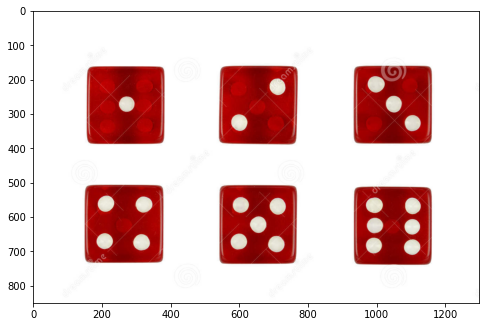

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

show(img)

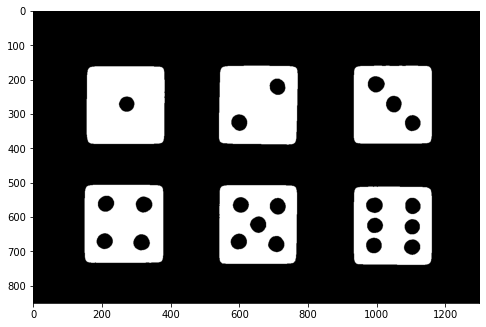

In [ ]:
_,thresh = cv2.threshold(gray, 165, 1, cv2.THRESH_BINARY_INV)

n = 3
arr = np.ones((n,n), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, arr)

show(thresh)

In [ ]:
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print(len(contours))

27


In [ ]:
# drawn = cv2.drawContours(img, contours, -1, (0,255,0), 7)

# show(drawn)

In [ ]:
print(hierarchy)

[[[ 7 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [-1  5 -1  0]
  [13  0  8 -1]
  [ 9 -1 -1  7]
  [10  8 -1  7]
  [11  9 -1  7]
  [12 10 -1  7]
  [-1 11 -1  7]
  [18  7 14 -1]
  [15 -1 -1 13]
  [16 14 -1 13]
  [17 15 -1 13]
  [-1 16 -1 13]
  [20 13 19 -1]
  [-1 -1 -1 18]
  [24 18 21 -1]
  [22 -1 -1 20]
  [23 21 -1 20]
  [-1 22 -1 20]
  [-1 20 25 -1]
  [26 -1 -1 24]
  [-1 25 -1 24]]]


In [ ]:
dice = {}

for i in range(len(contours)):
    index = hierarchy[0][i][-1]
    if index != -1:
        dice.setdefault(index, [])
        dice[index].append(i)

print(dice)

{0: [1, 2, 3, 4, 5, 6], 7: [8, 9, 10, 11, 12], 13: [14, 15, 16, 17], 18: [19], 20: [21, 22, 23], 24: [25, 26]}


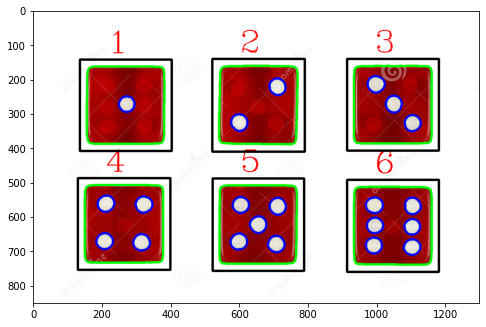

In [ ]:
for key,value in dice.items():
    bbox = cv2.boundingRect(contours[key])
    # bbox = cv2.boundingRect(contours[value])
    x = bbox[0]
    y = bbox[1]
    x1 = x + bbox[2]
    y1 = y + bbox[3]
    img = cv2.putText(img, str(len(value)), (x+60,y-40), cv2.FONT_HERSHEY_COMPLEX, 3, (255,0,0), 2)
    img = cv2.rectangle(img, (x-20,y-20), (x1+20,y1+20), (0,0,0), 5)
for i, h in enumerate(hierarchy[0]):
    child,parent = h[2:]
    if child != -1:
        img = cv2.drawContours(img, contours, i, (0,255,0), 6)
    else:
        img = cv2.drawContours(img, contours, i, (0,0,255), 6)


show(img)